# Haptocellular carcinoma Survial Prediction
welcome to the prototype model for predicting the survival of patients with hepatocellular carcinoma.


**in this prototype you will find :**
- implementation of 3 algorithms : Logistic Regression, KNN and Naiieve Bayes
- Data Preprocessing steps
- Testing metrics (Accuracy, Senstivity and Specificity)


**Our Goal is to achieve the highest accurate model in order to increase survival rates of the patients** 

## Importing the data 
lets see what our data is made of 

In [1]:
# turning warnings off and viewing the tables fully 
options(warn= -1)
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

# importing the dataset 
data_dirty <- read.csv("hcc-data.txt", na.strings = "?",col.names = c("Gender"
,"Symptoms"
,"Alcohol"
,"HBsAg"
,"HBeAg"
,"HBcAb"
,"HCVAb"
,"Cirrhosis"
,"Endemic"
,"Smoking"
,"Diabetes"
,"Obesity"
,"Hemochro"
,"AHT"
,"CRI"
,"HIV"
,"NASH"
,"Varices"
,"Spleno"
,"PHT"
,"PVT"
,"Metastasis"
,"Hallmark"
,"Age"
,"Grams_day"
,"Packs_year"
,"PS"
,"Encephalopathy"
,"Ascites"
,"INR"
,"AFP"
,"Hemoglobin"
,"MCV"
,"Leucocytes"
,"Platelets"
,"Albumin"
,"Total_Bil"
,"ALT"
,"AST"
,"GGT"
,"ALP"
,"TP"
,"Creatinine"
,"Nodule"
,"Major_Dim"
,"Dir_Bil"
,"Iron"
,"Sat"
,"Ferritin"
,"Class"))
data_dirty$Class <- as.factor(data_dirty$Class)


In [2]:
head(data_dirty)

Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,NA,0,0,0,0,1,1,NA,NA,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0,NA,0,1,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,1.8,NA,NA,NA,NA,1
1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50,50,2,1,2,0.96,5.8,8.9,79.8,8.4,472,3.30,0.40,58,68,202,109,7.0,2.10,5,13.0,0.10,28,6,16,1
1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40,30,0,1,1,0.95,2440.0,13.4,97.1,9.0,279,3.70,0.40,16,64,94,174,8.1,1.11,2,15.7,0.20,NA,NA,NA,0
1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100,30,0,1,1,0.94,49.0,14.3,95.1,6.4,199,4.10,0.70,147,306,173,109,6.9,1.80,1,9.0,NA,59,15,22,1
1,0,1,0,NA,0,0,1,0,NA,0,1,0,0,0,0,0,1,1,1,0,0,1,75,NA,NA,1,1,2,1.58,110.0,13.4,91.5,5.4,85,3.40,3.50,91,122,242,396,5.6,0.90,1,10.0,1.40,53,22,111,0
1,0,0,0,NA,1,1,1,0,0,1,0,NA,0,0,0,0,0,0,0,0,0,1,49,0,0,0,1,1,1.40,138.9,10.4,102.0,3.2,42000,2.35,2.72,119,183,143,211,7.3,0.80,5,2.6,2.19,171,126,1452,0


In [3]:
summary(data_dirty)

     Gender          Symptoms         Alcohol           HBsAg       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.0000   Median :0.0000  
 Mean   :0.8049   Mean   :0.6438   Mean   :0.7378   Mean   :0.1088  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                  NA's   :18                        NA's   :17      
     HBeAg           HBcAb            HCVAb          Cirrhosis     
 Min.   :0.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.008   Mean   :0.2714   Mean   :0.2194   Mean   :0.9024  
 3rd Qu.:0.000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.000   Max.   :1.0000   Max.  

In [4]:
summary(data_dirty)

     Gender          Symptoms         Alcohol           HBsAg       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.0000   Median :0.0000  
 Mean   :0.8049   Mean   :0.6438   Mean   :0.7378   Mean   :0.1088  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                  NA's   :18                        NA's   :17      
     HBeAg           HBcAb            HCVAb          Cirrhosis     
 Min.   :0.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.008   Mean   :0.2714   Mean   :0.2194   Mean   :0.9024  
 3rd Qu.:0.000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.000   Max.   :1.0000   Max.  

In [5]:
str(data_dirty)

'data.frame':	164 obs. of  50 variables:
 $ Gender        : int  0 1 1 1 1 1 1 1 1 1 ...
 $ Symptoms      : int  NA 0 1 1 0 0 1 1 1 0 ...
 $ Alcohol       : int  0 1 1 1 1 0 1 1 1 1 ...
 $ HBsAg         : int  0 1 0 1 0 0 0 0 0 0 ...
 $ HBeAg         : int  0 0 0 0 NA NA NA 0 0 0 ...
 $ HBcAb         : int  0 1 0 1 0 1 0 0 0 0 ...
 $ HCVAb         : int  1 0 0 0 0 1 0 0 0 1 ...
 $ Cirrhosis     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Endemic       : int  NA 0 0 0 0 0 0 0 0 NA ...
 $ Smoking       : int  NA 1 1 1 NA 0 1 1 0 NA ...
 $ Diabetes      : int  1 0 1 0 0 1 1 1 0 0 ...
 $ Obesity       : int  0 0 0 0 1 0 NA 0 0 0 ...
 $ Hemochro      : int  0 0 0 0 0 NA 0 0 1 0 ...
 $ AHT           : int  1 1 1 1 0 0 0 1 0 0 ...
 $ CRI           : int  0 1 0 1 0 0 0 0 0 0 ...
 $ HIV           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NASH          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Varices       : int  1 0 0 0 1 0 0 NA 0 NA ...
 $ Spleno        : int  0 0 0 0 1 0 1 1 1 1 ...
 $ PHT           : int  0 1 0 0 1 

In [6]:
sapply(data_dirty, function(x) sum(is.na(x)))

Gender       Symptoms        Alcohol          HBsAg          HBeAg 
             0             18              0             17             39 
         HBcAb          HCVAb      Cirrhosis        Endemic        Smoking 
            24              9              0             39             41 
      Diabetes        Obesity       Hemochro            AHT            CRI 
             3              9             23              3              2 
           HIV           NASH        Varices         Spleno            PHT 
            14             22             52             15             11 
           PVT     Metastasis       Hallmark            Age      Grams_day 
             3              4              2              0             48 
    Packs_year             PS Encephalopathy        Ascites            INR 
            53              0              1              2              4 
           AFP     Hemoglobin            MCV     Leucocytes      Platelets 
             8              3              3              3              3 
       Albumin      Total_Bil            ALT            AST            GGT 
             6              5              4              3              3 
           ALP             TP     Creatinine         Nodule      Major_Dim 
             3             11              7              2             20 
       Dir_Bil           Iron            Sat       Ferritin          Class 
            44             78             79             79              0

**from the summary we deduce that:**
- there are high ratios of missing values 
- high sparsity between values of the featuers 

## Preprocessing the Data

### Data Imputation
**the first step in our preprocessing stage**

we used mice package for prediction of the missing vales 

In [7]:
library("mice")

Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind



#### most of our features are an important predictors so we will use them in imputing the missing 
let\`s split the data first to categorical and nominal values

**from looking into the data set here are the categorical featres** 
"Gender"
,"Symptoms"
,"Alcohol"
,"HBsAg"
,"HBeAg"
,"HBcAb"
,"HCVAb"
,"Cirrhosis"
,"Endemic"
,"Smoking"
,"Diabetes"
,"Obesity"
,"Hemochro"
,"AHT"
,"CRI"
,"HIV"
,"NASH"
,"Varices"
,"Spleno"
,"PHT"
,"PVT"
,"Metastasis"
,"Hallmark"
,"PS"
,"Encephalopathy"
,"Ascites"

**the nominal features are the rest** 

In [8]:
# initializing the object with zero iterations 
# setting the methods for both categorical and numerical features 
init = mice(data_dirty, maxit=0, seed=123) 
meth = init$method

**we used Predictive Mean Matching Method for both for now**

using different methods is still under testing for future stages of our prototype 

In [9]:
# importing categorical features 
meth[c("Gender"
,"Symptoms"
,"Alcohol"
,"HBsAg"
,"HBeAg"
,"HBcAb"
,"HCVAb"
,"Cirrhosis"
,"Endemic"
,"Smoking"
,"Diabetes"
,"Obesity"
,"Hemochro"
,"AHT"
,"CRI"
,"HIV"
,"NASH"
,"Varices"
,"Spleno"
,"PHT"
,"PVT"
,"Metastasis"
,"Hallmark"
,"PS"
,"Encephalopathy"
,"Ascites")] = "cart"

# importing numerical features 
meth[c("Age"
,"Grams_day"
,"Packs_year"
,"INR"
,"AFP"
,"Hemoglobin"
,"MCV"
,"Leucocytes"
,"Platelets"
,"Albumin"
,"Total_Bil"
,"ALT"
,"AST"
,"GGT"
,"ALP"
,"TP"
,"Creatinine"
,"Nodule"
,"Major_Dim"
,"Dir_Bil"
,"Iron"
,"Sat"
,"Ferritin")] = "mean"

# # restricting the imputation of class 
# meth[c("Class")] = ""

In [10]:
imputed <- mice(data_dirty, method = meth, seed = 123)


 iter imp variable
  1   1  Symptoms  HBsAg  HBeAg  HBcAb  HCVAb  Endemic  Smoking  Diabetes  Obesity  Hemochro  AHT  CRI  HIV  NASH  Varices  Spleno  PHT  PVT  Metastasis  Hallmark  Grams_day  Packs_year  Encephalopathy  Ascites  INR  AFP  Hemoglobin  MCV  Leucocytes  Platelets  Albumin  Total_Bil  ALT  AST  GGT  ALP  TP  Creatinine  Nodule  Major_Dim  Dir_Bil  Iron  Sat  Ferritin
  1   2  Symptoms  HBsAg  HBeAg  HBcAb  HCVAb  Endemic  Smoking  Diabetes  Obesity  Hemochro  AHT  CRI  HIV  NASH  Varices  Spleno  PHT  PVT  Metastasis  Hallmark  Grams_day  Packs_year  Encephalopathy  Ascites  INR  AFP  Hemoglobin  MCV  Leucocytes  Platelets  Albumin  Total_Bil  ALT  AST  GGT  ALP  TP  Creatinine  Nodule  Major_Dim  Dir_Bil  Iron  Sat  Ferritin
  1   3  Symptoms  HBsAg  HBeAg  HBcAb  HCVAb  Endemic  Smoking  Diabetes  Obesity  Hemochro  AHT  CRI  HIV  NASH  Varices  Spleno  PHT  PVT  Metastasis  Hallmark  Grams_day  Packs_year  Encephalopathy  Ascites  INR  AFP  Hemoglobin  MCV  Leucocyte

In [11]:
data_imputed <- complete(imputed)

In [12]:
sapply(data_imputed, function(x) sum(is.na(x)))

Gender       Symptoms        Alcohol          HBsAg          HBeAg 
             0              0              0              0              0 
         HBcAb          HCVAb      Cirrhosis        Endemic        Smoking 
             0              0              0              0              0 
      Diabetes        Obesity       Hemochro            AHT            CRI 
             0              0              0              0              0 
           HIV           NASH        Varices         Spleno            PHT 
             0              0              0              0              0 
           PVT     Metastasis       Hallmark            Age      Grams_day 
             0              0              0              0              0 
    Packs_year             PS Encephalopathy        Ascites            INR 
             0              0              0              0              0 
           AFP     Hemoglobin            MCV     Leucocytes      Platelets 
             0              0              0              0              0 
       Albumin      Total_Bil            ALT            AST            GGT 
             0              0              0              0              0 
           ALP             TP     Creatinine         Nodule      Major_Dim 
             0              0              0              0              0 
       Dir_Bil           Iron            Sat       Ferritin          Class 
             0              0              0              0              0

**now that the data is imputed let\`s check the summary to make sure nothing is wrong**

In [13]:
summary(data_imputed)

     Gender          Symptoms        Alcohol           HBsAg       
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.000   Median :1.0000   Median :0.0000  
 Mean   :0.8049   Mean   :0.628   Mean   :0.7378   Mean   :0.1159  
 3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  
     HBeAg             HBcAb            HCVAb          Cirrhosis     
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.00000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.01829   Mean   :0.2927   Mean   :0.2134   Mean   :0.9024  
 3rd Qu.:0.00000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    Endemic           Smoking     

# Training the data
### with our data free of missing values we can proceed into the training 
**we loaded the class feature as a factor for prediction**

In [14]:
data_imputed$Class <- make.names(data_imputed$Class)
data_imputed$Class <- as.factor(data_imputed$Class) # needed for algorithms below
levels(data_imputed$Class)

[1] "X0" "X1"

**we split the data with ratio 0.8 for training** 

In [15]:
# splitting the data
library(caret)

set.seed(123)
trainIndex = createDataPartition(y = data_imputed$Class, p=0.80, list=FALSE, times=1)

x_train <- data_imputed[trainIndex, ]
x_test  <- data_imputed[-trainIndex, ]

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [16]:
nrow(x_train)
nrow(x_test)

[1] 132

[1] 32

# Logistic Regression

## using GLMnet for prediction
**we used trainControl Cross-validation function with 10 folds and 3 repeates with the calculation of class probabilites 
and a summary function that computes the required metrics**

**for more illustration here\`s the equation used in the glmnet algorithm which shows percisely the parameters tuned in the search** 

**as $\alpha$ is the mixing ratio between L2 and L1 regularizations** 
**and $\lambda$ is the penality for the regularization**

**using Preproc center and scaling for standardization of the values where we noted that inputs have high sparsity of values which would affect a distance model like Logisitc regression and KNN**


$ \min_{(\beta_0, \beta) \in \mathbb{R}^{p+1}} -\left[\frac{1}{N} \sum_{i=1}^N y_i \cdot (\beta_0 + x_i^T \beta) - \log (1+e^{(\beta_0+x_i^T \beta)})\right] + \lambda \big[ (1-\alpha)||\beta||_2^2/2 + \alpha||\beta||_1\big]$


In [38]:
# cross validator 
ctrl <- trainControl(
  method = "repeatedcv",
  repeats = 3, 
  classProbs = TRUE, 
  summaryFunction = twoClassSummary  
)

#setting seed to prevent randomness 
set.seed(123)

# the model training 
glmFit <- train(
  Class ~ .,
  data = x_train,
  method = "glmnet",
  preProc = c("center", "scale"),
  tuneLength = 20,
  trControl = ctrl,
  metric = "Sens"
)

In [39]:
glmFit

glmnet 

132 samples
 49 predictor
  2 classes: 'X0', 'X1' 

Pre-processing: centered (49), scaled (49) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 118, 118, 119, 119, 119, 119, ... 
Resampling results across tuning parameters:

  alpha      lambda        ROC        Sens        Spec     
  0.1000000  5.828055e-05  0.7150309  0.60000000  0.7037037
  0.1000000  9.036492e-05  0.7150309  0.60000000  0.7037037
  0.1000000  1.401122e-04  0.7150309  0.60000000  0.7037037
  0.1000000  2.172462e-04  0.7165741  0.60000000  0.7078704
  0.1000000  3.368437e-04  0.7153704  0.62000000  0.7078704
  0.1000000  5.222815e-04  0.7153704  0.62000000  0.7120370
  0.1000000  8.098057e-04  0.7192901  0.62555556  0.7245370
  0.1000000  1.255616e-03  0.7276852  0.62444444  0.7412037
  0.1000000  1.946853e-03  0.7320216  0.63000000  0.7490741
  0.1000000  3.018627e-03  0.7371142  0.61888889  0.7407407
  0.1000000  4.680428e-03  0.7462346  0.62555556  0.7444444
  0.1000000 

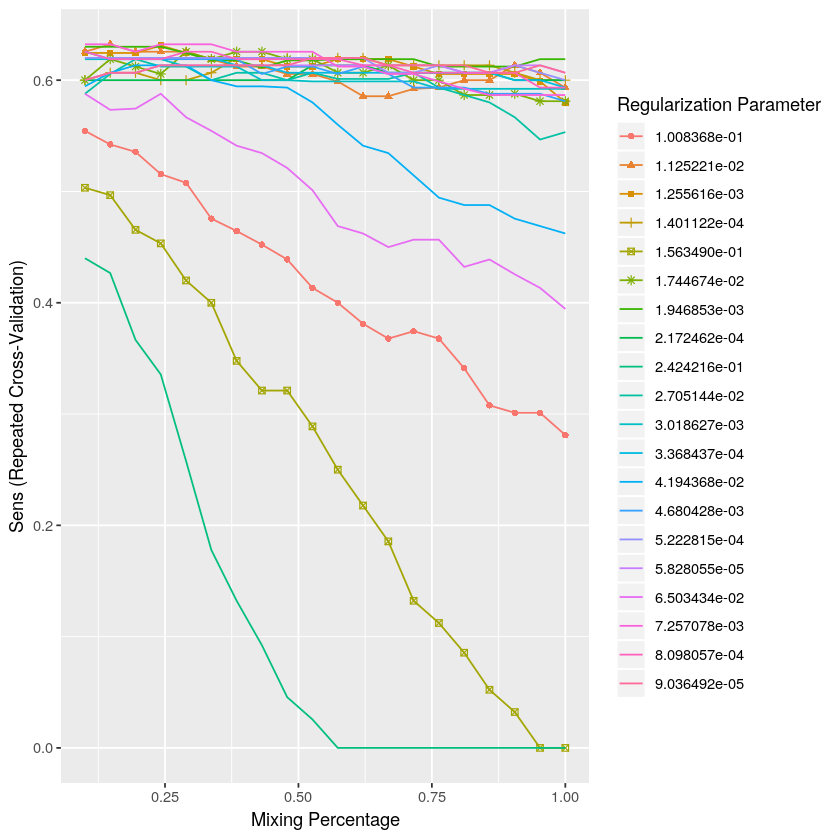

In [40]:
ggplot(glmFit)

In [41]:
glmClasses <- predict(glmFit, newdata = x_test)
str(glmClasses)

 Factor w/ 2 levels "X0","X1": 2 2 2 1 1 2 2 1 1 2 ...


In [42]:
confusionMatrix(data = glmClasses, x_test$Class)
# levels(x_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction X0 X1
        X0  9  5
        X1  3 15
                                         
               Accuracy : 0.75           
                 95% CI : (0.566, 0.8854)
    No Information Rate : 0.625          
    P-Value [Acc > NIR] : 0.09838        
                                         
                  Kappa : 0.4839         
                                         
 Mcnemar's Test P-Value : 0.72367        
                                         
            Sensitivity : 0.7500         
            Specificity : 0.7500         
         Pos Pred Value : 0.6429         
         Neg Pred Value : 0.8333         
             Prevalence : 0.3750         
         Detection Rate : 0.2812         
   Detection Prevalence : 0.4375         
      Balanced Accuracy : 0.7500         
                                         
       'Positive' Class : X0             
                                         

# k-Nearest Neighbors 

![knns](https://miro.medium.com/max/613/0*AQeJZfMd1z-vx4iH.png "KNN")
**a brief representation for the knn algorithm as shown the main parameter of this algorithm in K**

In [43]:
set.seed(123)

# Model
knnFit <- train(
  Class ~ .,
  data = x_train,
  method = "knn",
  preProc = c("center", "scale"),
  tuneLength = 60,
  trControl = ctrl,
  metric = "Sens")

knnFit

k-Nearest Neighbors 

132 samples
 49 predictor
  2 classes: 'X0', 'X1' 

Pre-processing: centered (49), scaled (49) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 118, 118, 119, 119, 119, 119, ... 
Resampling results across tuning parameters:

  k    ROC        Sens         Spec     
    5  0.6782562  0.258888889  0.8592593
    7  0.7191204  0.221111111  0.9138889
    9  0.7291127  0.183333333  0.9425926
   11  0.7694444  0.203333333  0.9592593
   13  0.7590895  0.201111111  0.9634259
   15  0.7576852  0.157777778  0.9796296
   17  0.7572762  0.143333333  0.9879630
   19  0.7606019  0.118888889  0.9791667
   21  0.7677160  0.104444444  0.9791667
   23  0.7519676  0.072222222  0.9833333
   25  0.7604552  0.052222222  0.9833333
   27  0.7620293  0.038888889  0.9833333
   29  0.7655864  0.018888889  0.9833333
   31  0.7795139  0.018888889  0.9833333
   33  0.7720448  0.018888889  0.9833333
   35  0.7772685  0.018888889  0.9833333
   37  0.7782562  0.01

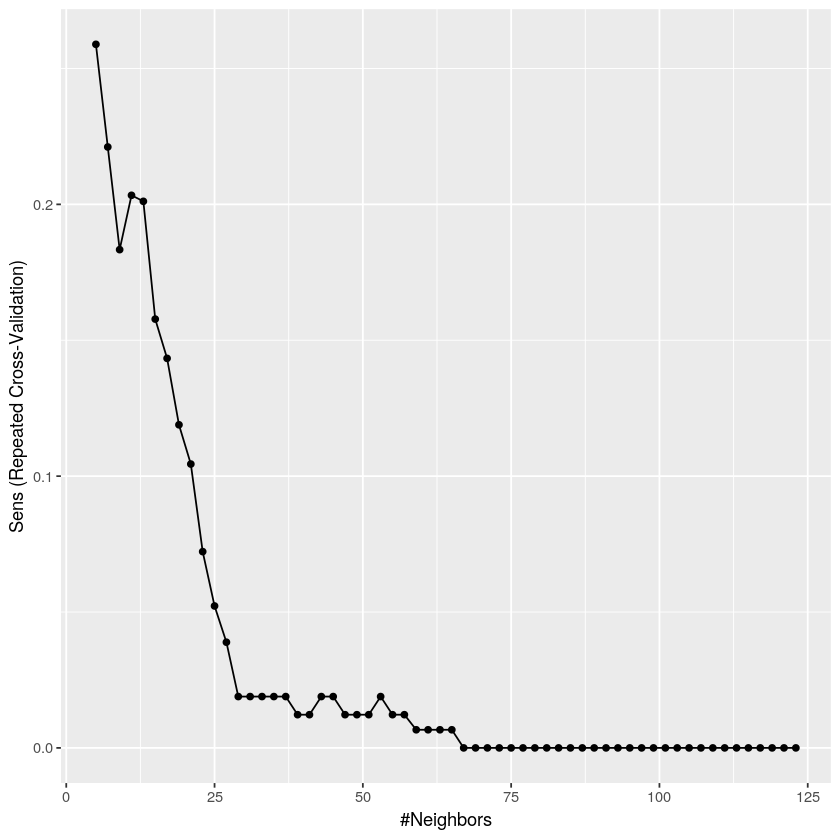

In [44]:
ggplot(knnFit)

In [46]:
knnPredict <- predict(knnFit,newdata = x_test)
confusionMatrix(knnPredict, x_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction X0 X1
        X0  7  3
        X1  5 17
                                         
               Accuracy : 0.75           
                 95% CI : (0.566, 0.8854)
    No Information Rate : 0.625          
    P-Value [Acc > NIR] : 0.09838        
                                         
                  Kappa : 0.4483         
                                         
 Mcnemar's Test P-Value : 0.72367        
                                         
            Sensitivity : 0.5833         
            Specificity : 0.8500         
         Pos Pred Value : 0.7000         
         Neg Pred Value : 0.7727         
             Prevalence : 0.3750         
         Detection Rate : 0.2188         
   Detection Prevalence : 0.3125         
      Balanced Accuracy : 0.7167         
                                         
       'Positive' Class : X0             
                                         

# NaiveBayes Classifier

![nb](https://www.saedsayad.com/images/Bayes_rule.png "NB")

**a Brief representation of the Naive Bayes algorithms which mainly depends on Bayes Rule**


- Computes the conditional a-posterior probabilities of a categorical class variable given independent predictor variables using the Bayes rule
- It has many Arguments such as (x, grouping, formula, data, prior, usekernal, laplace ...)

# Arguments
1. laplace
> it's named laplace correction or factor for laplace correction (fl) and could be have any value begining from **zero**
>
> By default, it's **zero** which means <span style="color: blue;"> *no-correction* </span>
>
> it's preffered to obtain small values to minimize the correction factor

2. usekernal
> It describes the kernal density estimation, depends on poisson value and it's logical having 2-values (TRUE or FALSE) which describes the following:
>
> <span style="color: red;"> TRUE </span> means **density** is used for density estimation
>
> <span style="color: red;"> FALSE </span> means **normal density** is estimated
>
> By default, it's <span style="color: blue;"> *FALSE* </span>

3. adjust


In [47]:
set.seed(123)

# Model
nbFit <- train(
  Class ~ .,
  data = x_train,
  method = "naive_bayes",
  preProc = c("center", "scale"),
  trControl = ctrl,
  metric = "Sens")

nbFit

Naive Bayes 

132 samples
 49 predictor
  2 classes: 'X0', 'X1' 

Pre-processing: centered (49), scaled (49) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 118, 118, 119, 119, 119, 119, ... 
Resampling results across tuning parameters:

  usekernel  ROC        Sens       Spec     
  FALSE      0.6793056  0.4911111  0.7189815
   TRUE      0.6585494  0.3322222  0.7819444

Tuning parameter 'laplace' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Sens was used to select the optimal model using the largest value.
The final values used for the model were laplace = 0, usekernel = FALSE
 and adjust = 1.

In [48]:
nbPredict <- predict(nbFit,newdata = x_test)
confusionMatrix(nbPredict, x_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction X0 X1
        X0  7  5
        X1  5 15
                                          
               Accuracy : 0.6875          
                 95% CI : (0.4999, 0.8388)
    No Information Rate : 0.625           
    P-Value [Acc > NIR] : 0.2961          
                                          
                  Kappa : 0.3333          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.5833          
            Specificity : 0.7500          
         Pos Pred Value : 0.5833          
         Neg Pred Value : 0.7500          
             Prevalence : 0.3750          
         Detection Rate : 0.2188          
   Detection Prevalence : 0.3750          
      Balanced Accuracy : 0.6667          
                                          
       'Positive' Class : X0              
                                    

# Next Steps 
**Models accuracies are a bit decent but we aspire for more so these are the proposed steps that we will dol next**
- Exploratory Data Analysis : we want to know our data better and visualize how each feature affect the output 
- Feature Selection : as you noticed we used the 49 features in our predictions which is not effective 
- Prevent models from Overfitting or underfitting 